<a href="https://colab.research.google.com/github/ShFANI/shfani.github.io/blob/main/Ames_Regression_GD_NN_Comparison_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 Ames Housing Price Prediction
The Ames Housing Dataset is a widely used real-world dataset for practicing regression and predictive modeling tasks. It contains detailed information on 2,930 residential homes sold in Ames, Iowa, between 2006 and 2010. The dataset includes 82 features describing various aspects of the homes, such as lot size, number of bedrooms and bathrooms, overall quality, garage type, year built, roof style, neighborhood, and many others — spanning numeric, categorical, and ordinal types. The target variable is the sale price of the house, making this dataset ideal for developing and comparing regression models (e.g., linear regression, random forest, gradient boosting) and neural network architectures. The richness of the dataset — including missing values, multicollinearity, and feature interactions — also makes it a strong candidate for demonstrating data preprocessing, feature engineering, hyperparameter tuning, and model evaluation techniques.

This notebook demonstrates:
- Multiple Linear Regression using Gradient Descent
- Neural Network Regression using Keras
- Hyperparameter tuning
- Overfitting and underfitting visualization
- Final model comparison

## 📊 Data Preprocessing
We load the Ames Housing dataset and apply preprocessing steps including handling missing values, one-hot encoding categorical variables, and feature scaling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AmesHousing.csv to AmesHousing.csv


In [4]:
df = pd.read_csv('AmesHousing.csv')
df.shape

(2930, 82)

In [5]:
# Drop ID columns
#inplace=True ensures that the change is applied directly to df without needing to reassign it.
df.drop(columns=['Order', 'PID'], inplace=True)
# Drop columns with too many missing values
df = df.drop(columns=df.columns[df.isnull().mean() > 0.3])
# Separate features and target
y = df['SalePrice']
X = df.drop(columns=['SalePrice'])

In [6]:
df.shape

(2930, 74)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MS SubClass,2930.0,NaN,NaN,NaN,57.387372,42.638025,20.0,20.0,50.0,70.0,190.0
MS Zoning,2930,7,RL,2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,2440.0,NaN,NaN,NaN,69.22459,23.365335,21.0,58.0,68.0,80.0,313.0
Lot Area,2930.0,NaN,NaN,NaN,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
Street,2930,2,Pave,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Mo Sold,2930.0,NaN,NaN,NaN,6.216041,2.714492,1.0,4.0,6.0,8.0,12.0
Yr Sold,2930.0,NaN,NaN,NaN,2007.790444,1.316613,2006.0,2007.0,2008.0,2009.0,2010.0
Sale Type,2930,10,WD,2536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sale Condition,2930,6,Normal,2413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


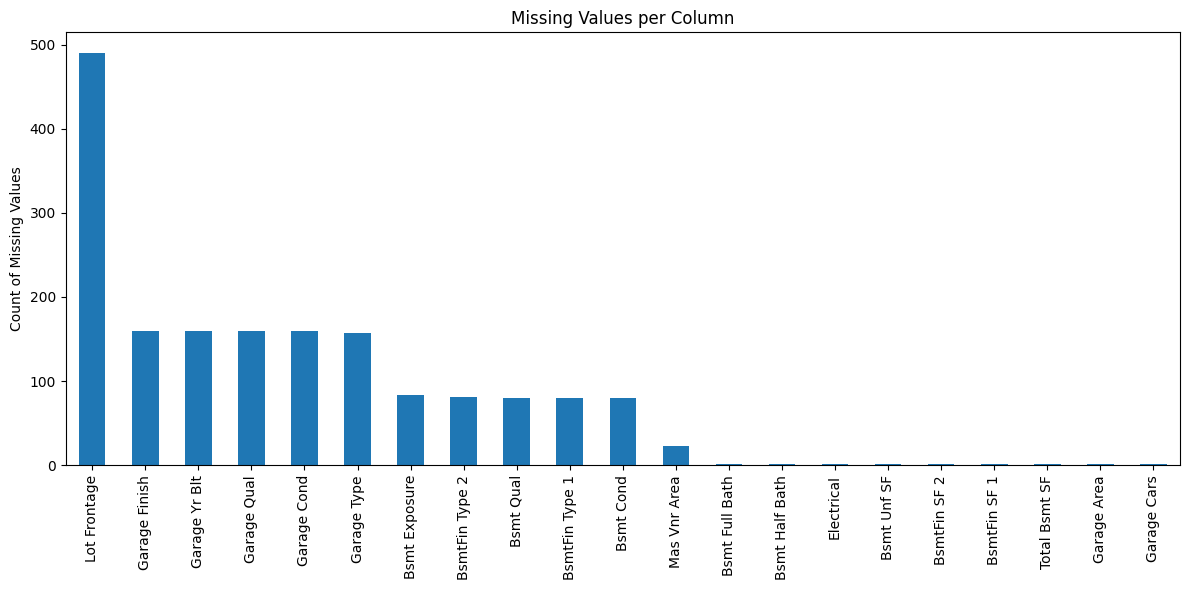

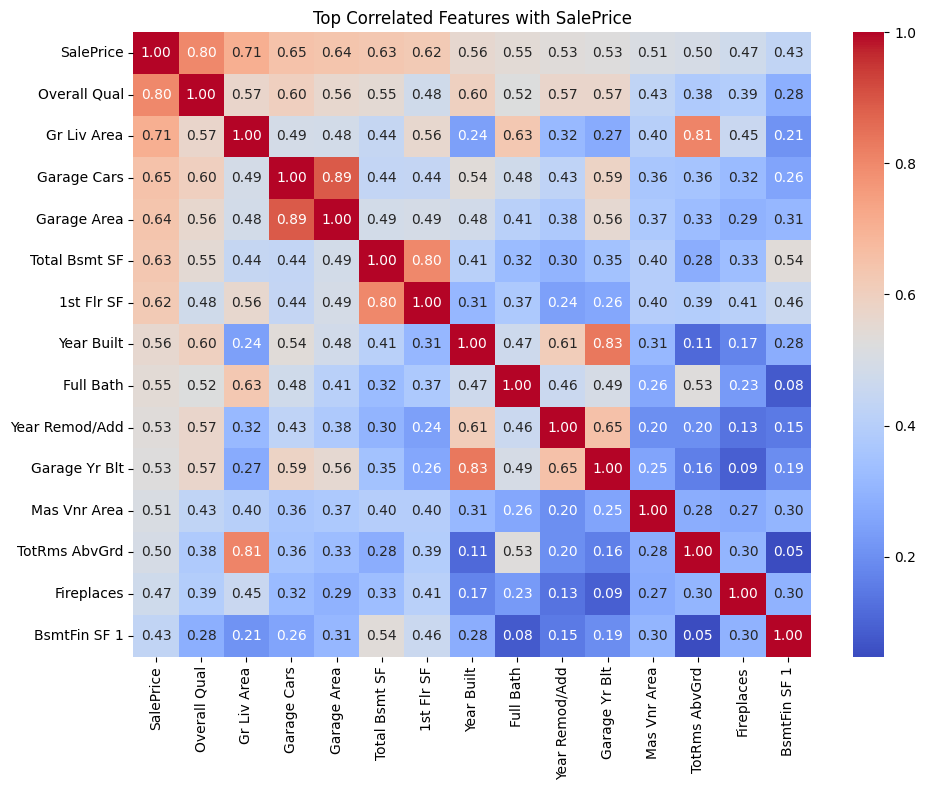

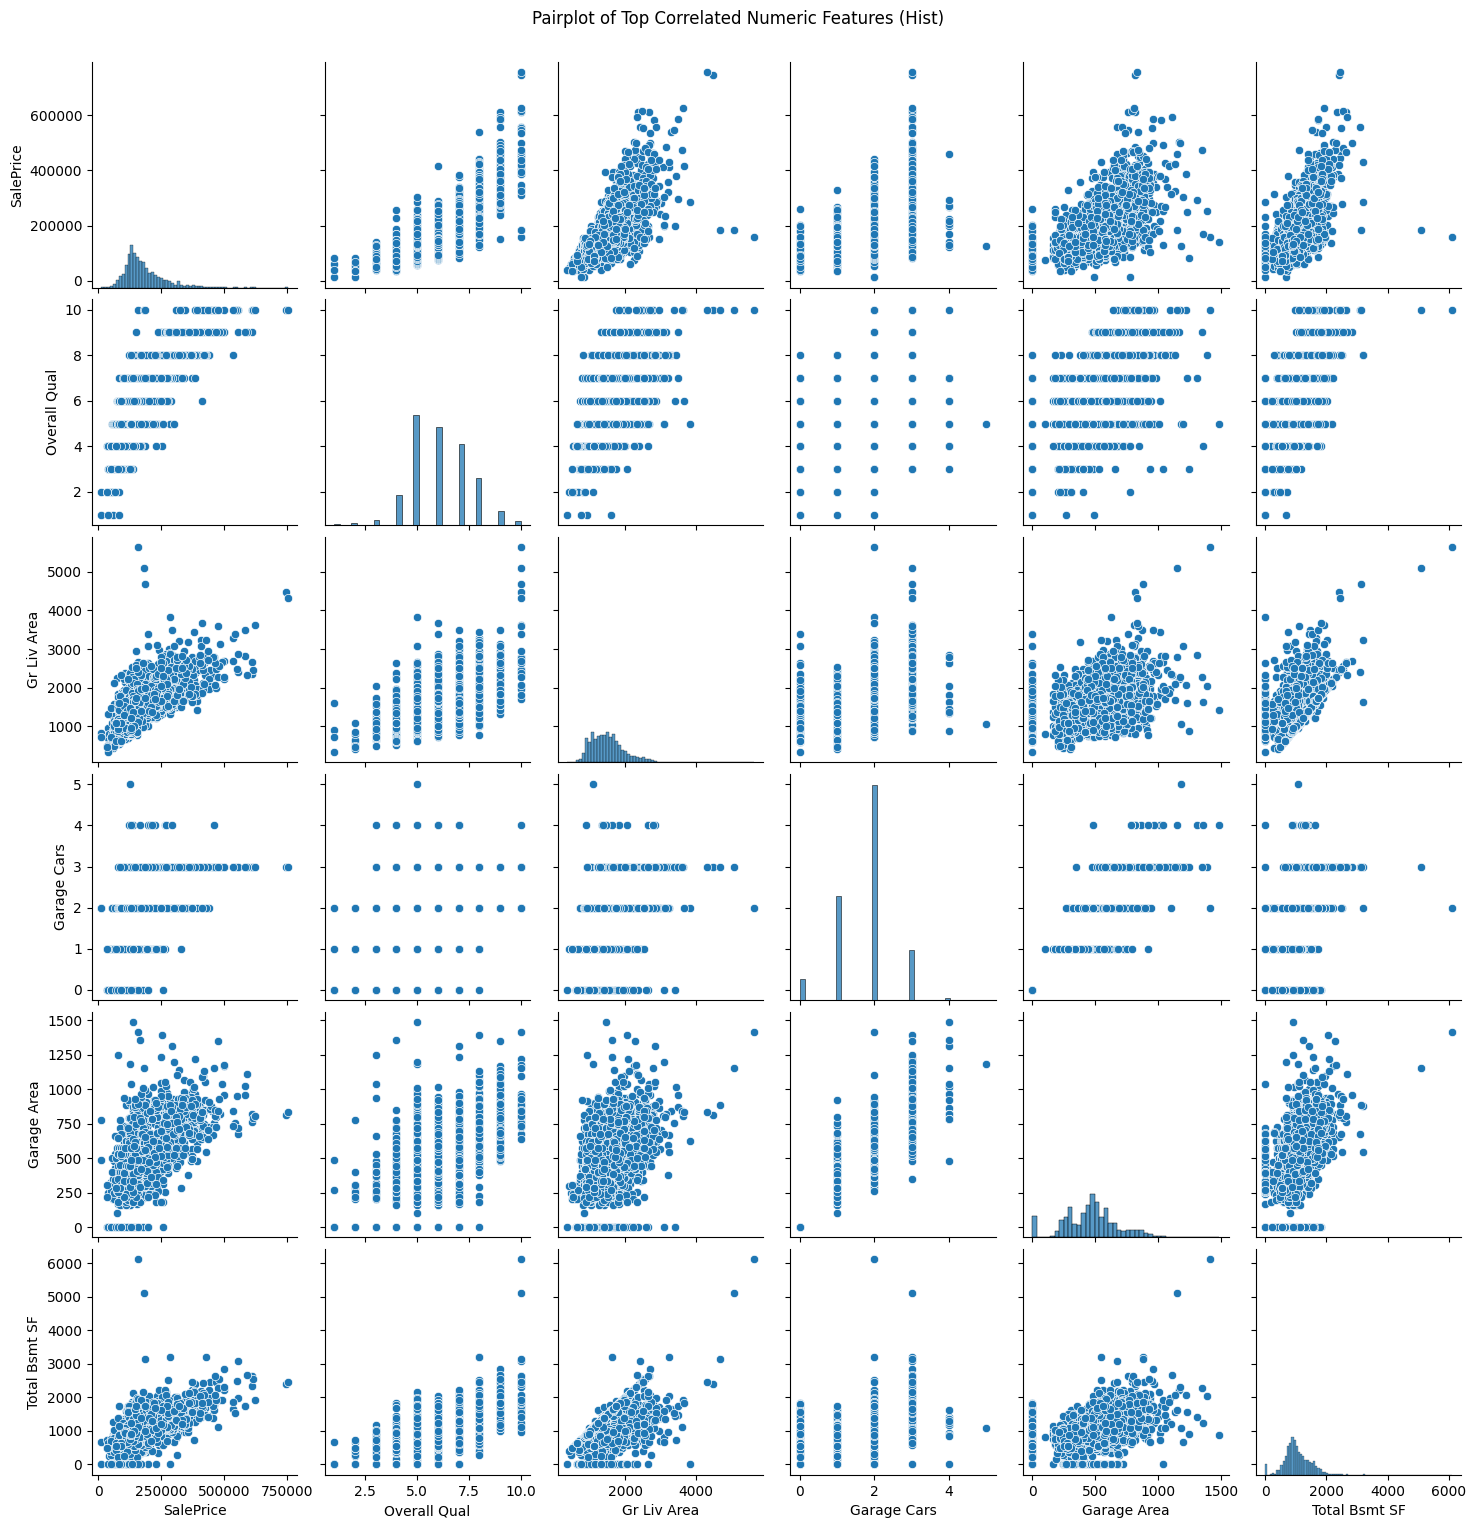

In [7]:
# Display dataset info
print("Dataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all').T)

# Missing value analysis
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correlation matrix for numeric features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Top correlated features with SalePrice
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_corr, top_corr], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()

# Pairplot for top correlated numeric features (top 6 for clarity)
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(6).index
clean_data = df[top_features].dropna()

sns.pairplot(clean_data, diag_kind="hist")
plt.suptitle("Pairplot of Top Correlated Numeric Features (Hist)", y=1.02)
plt.show()


### 🔍 Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand the relationships between features and the target variable, `SalePrice`.

- **Visualizations** like histograms and scatter plots reveal the distribution and spread of key variables.
- For instance, a scatter plot of `GrLivArea` (above-ground living area) vs. `SalePrice` usually shows a positive linear trend, suggesting larger houses tend to sell for more.
- **Correlation heatmaps** can highlight which features are most strongly associated with the sale price.
- This step helps us detect outliers, uncover non-linear relationships, and decide on transformations or feature engineering strategies.


In [8]:
# Prepare the data
plot_df = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Year Built']].dropna()

# Import plotly.express
import plotly.express as px

# Create interactive scatter plot
fig = px.scatter(
    plot_df,
    x='Gr Liv Area',
    y='SalePrice',
    color='Overall Qual',
    size='Garage Cars',
    hover_data=['Year Built'],
    title='Sale Price vs. Above Ground Living Area by Overall Quality and Garage Capacity',
    labels={
        'Gr Liv Area': 'Above Ground Living Area (sq ft)',
        'SalePrice': 'Sale Price ($)',
        'Overall Qual': 'Overall Quality',
        'Garage Cars': 'Garage Capacity'
    }
)

fig.show()

This interactive scatter plot visualizes the relationship between above-ground living area (Gr Liv Area) and sale price (SalePrice) of homes in the Ames Housing dataset. Each point represents a house, with the color indicating the overall quality of the house (Overall Qual) and the size of the bubble reflecting garage capacity (Garage Cars). The hover tooltip also shows the Year Built.

From the plot, a positive linear trend is visible: houses with more above-ground living space generally have higher sale prices. Furthermore, houses with higher overall quality (darker colors) tend to cluster in the upper price ranges, reinforcing the impact of build quality on market value. Larger bubbles (indicating more garage space) are also more common among higher-priced homes. This interactive visualization helps highlight multivariate relationships and allows users to explore how different attributes influence housing prices in a dynamic and intuitive way.

In [9]:
# Identify numeric and categorical columns
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Preprocess and split
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## 📈 Linear Regression with Gradient Descent
We implement a gradient descent algorithm to fit a linear regression model to the data. This includes initializing weights, computing the cost, and iteratively updating weights based on gradients.

In [ ]:
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m = X.shape[0]
    # Convert X to a dense NumPy array if it's a sparse matrix (e.g., from OneHotEncoder or similar).
    X_dense = X.toarray() if hasattr(X, 'toarray') else X
    X_b = np.c_[np.ones((m, 1)), X_dense]
    theta = np.zeros(X_b.shape[1])

    for epoch in range(epochs):
        gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= lr * gradients

        if np.any(np.isnan(theta)) or np.any(np.isinf(theta)):
            print(f"⚠️ Gradient Descent diverged at epoch {epoch} with lr={lr}")
            return None

    return theta

# Ensure inputs are dense
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Check for NaNs in inputs
print("🔎 Checking data for NaNs:")
print("NaNs in X_train:", np.isnan(X_train_dense).sum())
print("NaNs in X_test:", np.isnan(X_test_dense).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

results_gd = []

# Use safer learning rates
for lr in [0.01, 0.001, 0.0001]:
    for epochs in [1000, 2000]:
        theta = gradient_descent(X_train_dense, y_train, lr, epochs)
        if theta is None:
            continue  # Skip unstable config

        X_test_b = np.c_[np.ones((X_test_dense.shape[0], 1)), X_test_dense]
        y_pred = X_test_b.dot(theta)

        # Skip if prediction exploded
        if np.any(np.isnan(y_pred)) or np.any(np.isinf(y_pred)):
            print(f"⚠️ NaNs or inf in predictions for lr={lr}, epochs={epochs}")
            continue

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results_gd.append((lr, epochs, r2, rmse))

# Show result
if results_gd:
    best_gd = max(results_gd, key=lambda x: x[2])
    print(f"\n✅ Best GD → LR: {best_gd[0]}, Epochs: {best_gd[1]}, R²: {best_gd[2]:.3f}, RMSE: ${best_gd[3]:,.2f}")
else:
    print("❌ No stable configuration found.")



🔎 Checking data for NaNs:
NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0

✅ Best GD → LR: 0.01, Epochs: 2000, R²: 0.894, RMSE: $29,218.08


## 🤖 Neural Network Regression with Keras
A feedforward neural network is built using Keras with one or more hidden layers. Early stopping is used to avoid overfitting by monitoring the validation loss.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_nn(neurons=128, lr=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dense(neurons // 2, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

results_nn = []
histories = {}

for neurons in [64, 128]:
    for lr in [0.01, 0.001]:
        model = build_nn(neurons, lr)
        es = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=100,
            batch_size=32,
            verbose=0,
            callbacks=[es]
        )
        y_pred = model.predict(X_test).flatten()
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        key = f"neurons={neurons}, lr={lr}"
        histories[key] = history
        results_nn.append((neurons, lr, r2, rmse))

# Display best results
best_nn = max(results_nn, key=lambda x: x[2])
print(f"Best NN -> Neurons: {best_nn[0]}, LR: {best_nn[1]}, R²: {best_nn[2]:.3f}, RMSE: ${best_nn[3]:,.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Best NN -> Neurons: 64, LR: 0.01, R²: 0.905, RMSE: $27,586.31


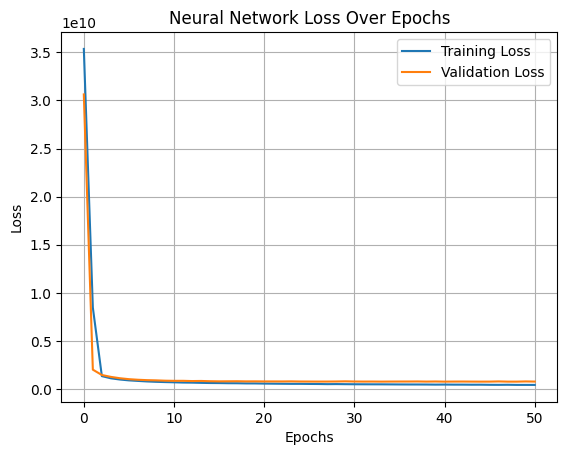

In [ ]:
best_key = f"neurons={best_nn[0]}, lr={best_nn[1]}"
history = histories[best_key]
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Gradient Descent', 'Neural Network'],
    'R2': [best_gd[2], best_nn[2]],
    'RMSE': [best_gd[3], best_nn[3]]
})
display(comparison)
if best_gd[2] > best_nn[2]:
    print("Gradient Descent performed better.")
else:
    print("Neural Network performed better.")

,Model,R2,RMSE
0,Gradient Descent,0.893522,29218.077616
1,Neural Network,0.905083,27586.313128


Neural Network performed better.


### 📊 Model Performance Comparison

- The **Neural Network** showed a **lower RMSE** and a **higher R² score**, indicating it predicted house prices more accurately and captured more variance in the target variable than the linear model.
- This suggests that the **Neural Network performed better overall** on this dataset, likely due to its ability to model complex relationships.

If simplicity and interpretability are not the main goals, the neural network is the preferred model for this task.
